# Pandas Foundations

## Data Ingestion and Inspection

### Review of Pandas DataFrames

In [15]:
import pandas as pd

df = pd.read_csv('data/world_population.csv', index_col=0)
print(df.head())
print(df.tail())

      Total Population
Year                  
1960      3.034971e+09
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
      Total Population
Year                  
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
2010      6.924283e+09


In [16]:
import numpy as np

# Create array of DataFrame values
np_vals = df.values

# Create new array of base 10 logarithm values
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10()
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

### Building DataFrames from Scratch

In [18]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key, value) tuples and inspect the list
zipped = list(zip(list_keys, list_values))
print(zipped)

# Build and inspect a dictionary with the zipped list
data = dict(zipped)
print(data)

# Build and inspect a DataFrame from the dictionary
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
{'Country': ['United States', 'Soviet Union', 'United Kingdom'], 'Total': [1118, 473, 273]}
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [21]:
list_keys = ['a', 'b', 'c', 'd']
list_values = [[1980, 1981, 1982], ['Blondie', 'Christopher Cross', 'Joan Jett'], 
            ['Call Me', 'Arthurs Theme', 'Joan Jett I Love Rock and Roll'], [6, 3, 7]]
df = pd.DataFrame(dict(list(zip(list_keys, list_values))))
# Build a list of labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute
df.columns = list_labels

print(df)

   year             artist                            song  chart weeks
0  1980            Blondie                         Call Me            6
1  1981  Christopher Cross                   Arthurs Theme            3
2  1982          Joan Jett  Joan Jett I Love Rock and Roll            7


In [24]:
# Make a list of cities' names
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 
          'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 
          'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

# Make a string with the value 'PA'
state = 'PA'

# Construct a dictionary
data = {'state': state, 'city': cities}
print(data)

# Construct a DataFrame with broadcasting
df = pd.DataFrame(data)
print(df)

{'state': 'PA', 'city': ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']}
   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


### Importing and Exporting Data

In [27]:
# Read in the file, specifying the header and names
df = pd.read_csv('data/world_population.csv', header=0, names=['year', 'population'])
print(df)

   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


#### Delimiters, Headers, and Extensions

In [34]:
# Read in the file with correct parameters
df = pd.read_csv('data/messy_stock_data.tsv', delimiter=' ', header=3, comment='#')
print(df.columns)
print(df.head())

# Save the cleaned up DataFrame to a CSV file without the index
df.to_csv('data/clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df.to_excel('data/clean_stock_data.xlsx', index=False)

Index(['name', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  512.42  537.99  559.72  540.50  535.24  532.92  590.09  636.84   
3   APPLE  110.64  125.43  125.97  127.29  128.76  127.81  125.34  113.39   

      Sep     Oct     Nov     Dec  
0  145.36  146.11  137.21  137.96  
1   43.56   48.70   53.88   55.40  
2  617.93  663.59  735.39  755.35  
3  112.80  113.36  118.16  111.73  


### Plotting with Pandas

#### Plotting Series using Pandas

In [36]:
# Importing Data
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.columns)
print(df.head())

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')
   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


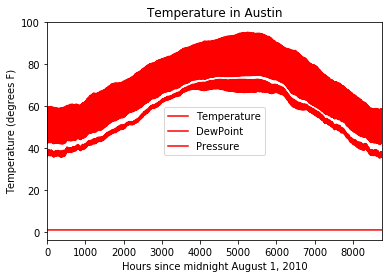

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot with color red
df.plot(color='red')
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('Temperature (degrees F)')
plt.show()

#### Plotting DataFrames

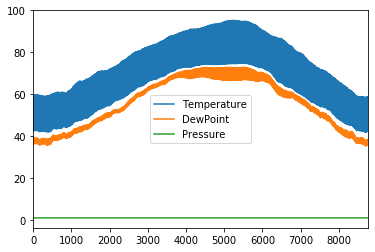

In [41]:
# Plot all columns by default
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119f517f0>,
      dtype=object)

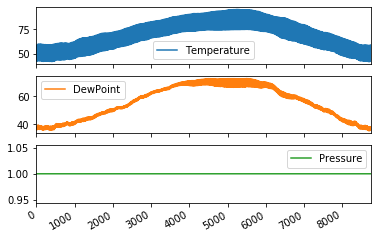

In [42]:
# Plot all columns as subplots
df.plot(subplots=True)

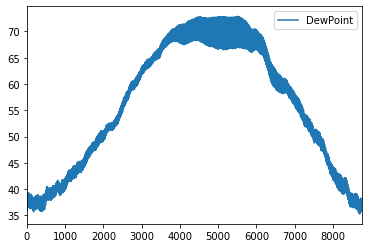

In [45]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot()

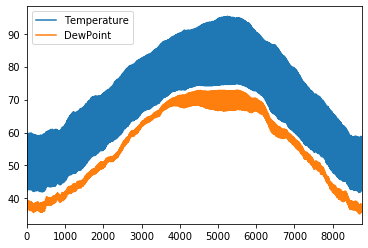

In [46]:
# Plot the Dew Point and Temperature data but not Pressure data
column_list2 = ['Temperature', 'DewPoint']
df[column_list2].plot()

## Exploratory Data Analysis

### Visual EDA

#### Pandas Line Plots

In [62]:
import pandas as pd

df = pd.read_csv('data/clean_stock_data.csv', index_col=0).T
df.reset_index(level=0, inplace=True)
print(df.columns)
df.rename(columns={'index': 'Month'}, inplace=True)
print(df.columns)
print(df)

Index(['index', 'IBM', 'MSFT', 'GOOGLE', 'APPLE'], dtype='object', name='name')
Index(['Month', 'IBM', 'MSFT', 'GOOGLE', 'APPLE'], dtype='object', name='name')
name Month     IBM   MSFT  GOOGLE   APPLE
0      Jan  156.08  45.51  512.42  110.64
1      Feb  160.01  43.08  537.99  125.43
2      Mar  159.81  42.13  559.72  125.97
3      Apr  165.22  43.47  540.50  127.29
4      May  172.25  47.53  535.24  128.76
5      Jun  167.15  45.96  532.92  127.81
6      Jul  164.75  45.61  590.09  125.34
7      Aug  152.77  45.51  636.84  113.39
8      Sep  145.36  43.56  617.93  112.80
9      Oct  146.11  48.70  663.59  113.36
10     Nov  137.21  53.88  735.39  118.16
11     Dec  137.96  55.40  755.35  111.73


#### Pandas Scatter Plots

Text(0, 0.5, 'Price (USD)')

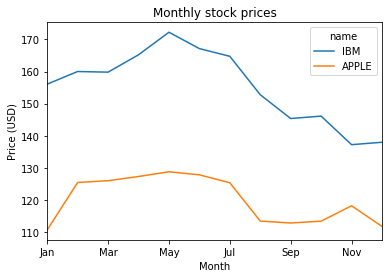

In [67]:
# Create a list of y-axis column names
y_columns = ['IBM', 'APPLE']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add a title
plt.title('Monthly stock prices')

# Add a y-axis label 
plt.ylabel('Price (USD)')

#### Pandas Boxplots

In [69]:
import pandas as pd

df = pd.read_csv('data/auto-mpg.csv')
print(df.columns)

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')


weight       AxesSubplot(0.125,0.125;0.352273x0.755)
mpg       AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

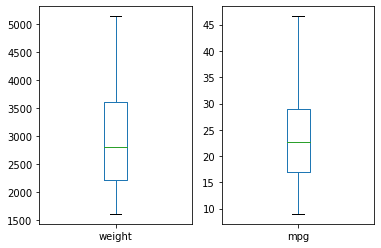

In [70]:
# Make a list of the column names to be plotted
cols = ['weight', 'mpg']

# Generate the boxplot
df[cols].plot(kind='box', subplots=True)

#### Pandas Hist, PDF and CDF

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'> (2,)


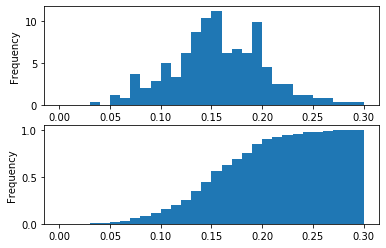

In [78]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)
print(type(fig), type(axes), axes.shape)

# Read data into DataFrame
df = pd.read_csv('data/tips.csv')

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0, 0.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', normed=True, bins=30, cumulative=True, range=(0, 0.3))

### Statistical EDA

#### Median

In [79]:
df = pd.read_csv('data/auto-mpg.csv')

df.mpg.median()

22.75

#### Mean

0.8
19.0


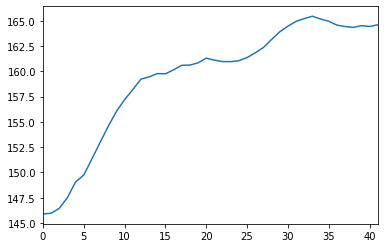

In [84]:
df = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

# The minimum value of the Engineering column
print(df.Engineering.min())

# The maximum value of the Engineering column
print(df.Engineering.max())

# The mean percentage per year
mean = df.mean(axis='columns')

# Plot the yearly mean percentage
mean.plot()

#### Median vs Mean

In [86]:
df = pd.read_csv('data/titanic.csv')

# Print summary statistics of the fare column with describe
print(df.fare.describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


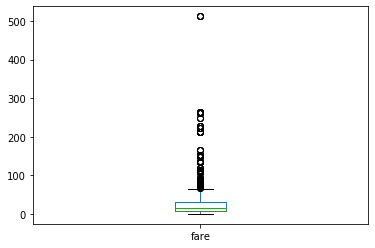

In [87]:
df.fare.plot(kind='box')

#### Quantiles

209
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

      ...   2007   2008    2009    2010   2011    2012    2013   2014    2015  \
0.05  ...  53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87  57.855   
0.95  ...  80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00  82.100   

         2016  
0.05  59.2555  
0.95  82.1650  

[2 rows x 218 columns]


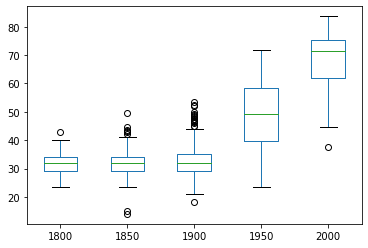

In [93]:
df = pd.read_csv('data/life_expectancy_at_birth.csv')

# Print the number of countries reported in 2015
print(df['2005'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a boxplot
years = ['1800', '1850', '1900', '1950', '2000']
df[years].plot(kind='box')
plt.show()

#### Standard Deviation

In [96]:
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.columns)
print(df.head())

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')
   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


In [100]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d %H:%M')
df.Date.dtype

dtype('<M8[ns]')

In [102]:
jan = df[df['Date'].dt.month == 1]
print(jan.head())
print(jan.shape)

   Temperature  DewPoint  Pressure                Date
0         46.2      37.5       1.0 2010-01-01 00:00:00
1         44.6      37.1       1.0 2010-01-01 01:00:00
2         44.1      36.9       1.0 2010-01-01 02:00:00
3         43.8      36.9       1.0 2010-01-01 03:00:00
4         43.5      36.8       1.0 2010-01-01 04:00:00
(744, 4)


In [103]:
mar = df[df['Date'].dt.month == 3]
print(mar.shape)

(743, 4)


In [104]:
print(jan.Temperature.mean(), mar.Temperature.mean())
print(jan.Temperature.std(), mar.Temperature.std())

49.9873655913979 60.8955585464334
5.90756765806953 6.479669152231178


### Separating Populations

#### Filtering and Counting

In [106]:
df = pd.read_csv('data/auto-mpg.csv')
print(df.columns)

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')


In [108]:
df[df['origin'] == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

#### Separate and Plot

In [109]:
df = pd.read_csv('data/titanic.csv')
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


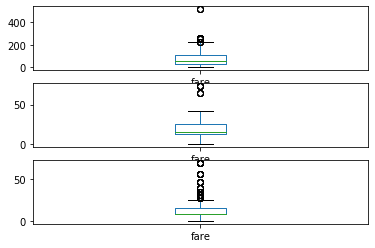

In [111]:
# Display the boxplots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a boxplot of the fare prices for First class passengers
df[df['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a boxplot of the fare prices for Second class passengers
df[df['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a boxplot of the fare prices for Third class passengers
df[df['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

### Indexing Time Series

#### Reading and Slicing Times

In [5]:
import pandas as pd

df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.head())
print(df.info())

   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null object
dtypes: float64(3), object(1)
memory usage: 273.8+ KB
None


In [6]:
df = pd.read_csv('data/weather_data_austin_2010.csv', parse_dates=['Date'])
print(df.head())
print(df.info())

   Temperature  DewPoint  Pressure                Date
0         46.2      37.5       1.0 2010-01-01 00:00:00
1         44.6      37.1       1.0 2010-01-01 01:00:00
2         44.1      36.9       1.0 2010-01-01 02:00:00
3         43.8      36.9       1.0 2010-01-01 03:00:00
4         43.5      36.8       1.0 2010-01-01 04:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 273.8 KB
None


In [8]:
df = pd.read_csv('data/weather_data_austin_2010.csv', index_col='Date',
                  parse_dates=True)
print(df.head())
print(df.info())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB
None


In [9]:
print(df.loc['2010-Aug-01'])

                     Temperature  DewPoint  Pressure
Date                                                
2010-08-01 00:00:00         79.0      70.8       1.0
2010-08-01 01:00:00         77.4      71.2       1.0
2010-08-01 02:00:00         76.4      71.3       1.0
2010-08-01 03:00:00         75.7      71.4       1.0
2010-08-01 04:00:00         75.1      71.4       1.0
2010-08-01 05:00:00         74.6      71.3       1.0
2010-08-01 06:00:00         74.5      71.3       1.0
2010-08-01 07:00:00         76.0      72.3       1.0
2010-08-01 08:00:00         79.8      72.8       1.0
2010-08-01 09:00:00         83.3      72.1       1.0
2010-08-01 10:00:00         86.6      71.1       1.0
2010-08-01 11:00:00         89.3      70.2       1.0
2010-08-01 12:00:00         91.6      69.1       1.0
2010-08-01 13:00:00         93.2      68.4       1.0
2010-08-01 14:00:00         94.4      67.6       1.0
2010-08-01 15:00:00         95.0      67.1       1.0
2010-08-01 16:00:00         94.8      66.8    

#### Creating and Using a DatetimeIndex

In [14]:
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.head())

# A format string
time_format = '%Y-%m-%d %H:%M'

# Convert string to datetime
df['Date'] = pd.to_datetime(df['Date'], format=time_format)

ts = pd.Series(df['Temperature'].array, index=df['Date'])
print(ts.head())

   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00
Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64


#### Partial String Indexing and Slicing

In [17]:
# Extract data from 9pm to 10pm on 2010-10-11
print(ts.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00'])

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
dtype: float64


In [16]:
# Extract data on 2010-07-04
print(ts.loc['2010-07-04'])

Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
2010-07-04 05:00:00    74.2
2010-07-04 06:00:00    74.4
2010-07-04 07:00:00    76.0
2010-07-04 08:00:00    79.0
2010-07-04 09:00:00    81.8
2010-07-04 10:00:00    84.6
2010-07-04 11:00:00    86.8
2010-07-04 12:00:00    88.9
2010-07-04 13:00:00    90.1
2010-07-04 14:00:00    91.1
2010-07-04 15:00:00    91.6
2010-07-04 16:00:00    91.5
2010-07-04 17:00:00    90.7
2010-07-04 18:00:00    89.5
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
dtype: float64


In [18]:
# Extract data from 2010-12-15 to 2010-12-31
print(ts.loc['2010-12-15':'2010-12-31'])

Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
2010-12-15 05:00:00    45.3
2010-12-15 06:00:00    45.6
2010-12-15 07:00:00    45.0
2010-12-15 08:00:00    45.8
2010-12-15 09:00:00    49.1
2010-12-15 10:00:00    52.2
2010-12-15 11:00:00    54.9
2010-12-15 12:00:00    57.2
2010-12-15 13:00:00    58.9
2010-12-15 14:00:00    60.2
2010-12-15 15:00:00    60.9
2010-12-15 16:00:00    60.5
2010-12-15 17:00:00    59.1
2010-12-15 18:00:00    55.8
2010-12-15 19:00:00    52.5
2010-12-15 20:00:00    50.7
2010-12-15 21:00:00    49.6
2010-12-15 22:00:00    48.6
2010-12-15 23:00:00    47.7
2010-12-16 00:00:00    47.6
2010-12-16 01:00:00    46.7
2010-12-16 02:00:00    46.1
2010-12-16 03:00:00    45.6
2010-12-16 04:00:00    45.2
2010-12-16 05:00:00    44.8
                       ... 
2010-12-30 18:00:00    54.1
2010-12-30 19:00:00    50.9
2010-12-30 20:00:00    49.0
2010-12-30 21:00:00    47.9
2010-12-30 22:0

#### Reindexing

In [26]:
ts2 = pd.Series(df['Temperature'].array)
print(ts2.head())
print(ts2.index)

0    46.2
1    44.6
2    44.1
3    43.8
4    43.5
dtype: float64
RangeIndex(start=0, stop=8759, step=1)


In [29]:
ts2 = ts.reindex(ts.index, method='ffill')
print(ts2.head())
print(ts2.index)

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64
DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=8759, freq=None)


### Resampling time series

#### Resampling and Frequency

In [33]:
df = pd.read_csv('data/weather_data_austin_2010.csv', index_col='Date', 
                 parse_dates=['Date'])
print(df.head())
# Downsample to 6 hour data and aggregate by mean
df1 = df['Temperature'].resample('6h').mean()
print(df1.head())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0
Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64


In [34]:
# Downsample to daily data
df2 = df['Temperature'].resample('D').count()
print(df2.head())

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64


#### Rolling Mean and Frequency

In [43]:
# Extract data from 2010-08-01 to 2010-08-15
unsmoothed = df['Temperature']['2010-08-01':'2010-08-31']
print(unsmoothed.tail())

Date
2010-08-31 19:00:00    86.6
2010-08-31 20:00:00    83.4
2010-08-31 21:00:00    81.2
2010-08-31 22:00:00    79.7
2010-08-31 23:00:00    78.2
Name: Temperature, dtype: float64


In [44]:
# Apply a rolling mean with a 24 hour window
smoothed = unsmoothed.rolling(window=24).mean()
print(smoothed.tail())

Date
2010-08-31 19:00:00    82.704167
2010-08-31 20:00:00    82.691667
2010-08-31 21:00:00    82.679167
2010-08-31 22:00:00    82.670833
2010-08-31 23:00:00    82.662500
Name: Temperature, dtype: float64


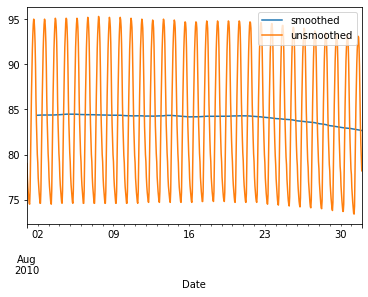

In [46]:
# Create a DataFrame with columns smoothed and unsmoothed
august = pd.DataFrame({'smoothed': smoothed, 'unsmoothed': unsmoothed})

# Plot both smoothed and unsmoothed data
import matplotlib.pyplot as plt
august.plot()
plt.show()

#### Resample and Roll with It

In [47]:
# Extract August 2010 data
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


### Manipulating Time Series

#### Method Chaining and Filtering

In [142]:
df = pd.read_csv('data/austin_airport_departure_data_2015_july.csv', header=10, 
                 index_col='Date (MM/DD/YYYY)', parse_dates=True)
print(df.head())
print(df.columns)

                    Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          103.0      N8607M   
2015-07-01                    WN          144.0      N8609A   
2015-07-01                    WN          178.0      N646SW   
2015-07-01                    WN          232.0      N204WN   
2015-07-01                    WN          238.0      N233LV   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         MDW                    06:30   
2015-07-01                         SAN                    20:55   
2015-07-01                         ELP                    20:30   
2015-07-01                         ATL                    05:45   
2015-07-01                         DAL                    12:30   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/

In [143]:
# Strip extra whitespace from the column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)', 'Unnamed: 17'],
      dtype='object')


In [144]:
# Extract data for which the destination airport is Dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures
stats = daily_departures. describe()
print(stats)

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64


#### Missing Values and Interpolation

In [129]:
ts1 = pd.Series(data=list(range(17)), index=date_rng)
print(ts1)

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
Freq: D, dtype: int64


In [131]:
date_rng2 = pd.to_datetime(['2016-07-01', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15'])
ts2 = pd.Series(data=list(range(11)), index=date_rng2)
print(ts2)

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64


In [133]:
# Reset ts2's index to ts1's and then use linear interpolation to fill in NaNs
ts2_interpolated = ts2.reindex(ts1.index).interpolate(how='linear')

differences = np.abs(ts1-ts2_interpolated)
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


#### Time Zones and Conversion

In [145]:
df = pd.read_csv('data/austin_airport_departure_data_2015_july.csv', header=10)
df.columns = df.columns.str.strip()
print(df.head())
print(df.columns)

  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           WN        07/01/2015          103.0      N8607M   
1           WN        07/01/2015          144.0      N8609A   
2           WN        07/01/2015          178.0      N646SW   
3           WN        07/01/2015          232.0      N204WN   
4           WN        07/01/2015          238.0      N233LV   

  Destination Airport Scheduled Departure Time Actual Departure Time  \
0                 MDW                    06:30                 06:52   
1                 SAN                    20:55                 20:50   
2                 ELP                    20:30                 20:45   
3                 ATL                    05:45                 05:49   
4                 DAL                    12:30                 12:34   

   Scheduled Elapsed Time(Minutes)  Actual Elapsed Time(Minutes)  \
0                            165.0                         147.0   
1                            170.0                  

In [153]:
mask = df['Destination Airport'] == 'LAX'
la = df[mask]
times_tz = pd.to_datetime(la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'])
print(times_tz[:5])
times_tz_central = times_tz.dt.tz_localize('US/Central')
print(times_tz_central[:5])
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
print(times_tz_pacific[:5])
times_tz_hcm = times_tz_central.dt.tz_convert('Asia/Saigon')
print(times_tz_hcm[:5])

33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]
33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]
33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]
33    2015-07-01 17:43:00+07:00
55    2015-07-02 04:27:00+07:00
91    2015-07-02 17:47:00+07:00
113   2015-07-03 04:23:00+07:00
134   2015-07-03 17:30:00+07:00
dtype: datetime64[ns, Asia/Saigon]


### Time Series Visualization

#### Plotting Time Series, Datetime Indexing

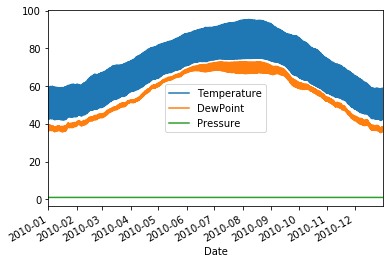

In [155]:
df = pd.read_csv('data/weather_data_austin_2010.csv', index_col='Date', parse_dates=['Date'])
df.plot()
plt.show()

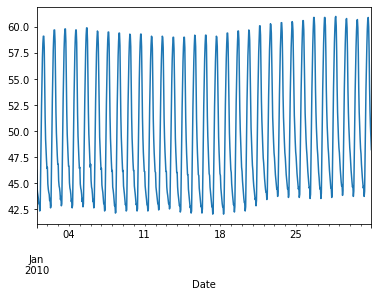

In [161]:
df = pd.read_csv('data/weather_data_austin_2010.csv')
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df['Temperature']['2010-01'].plot()
plt.show()

#### Plotting Date Ranges, Partial Indexing

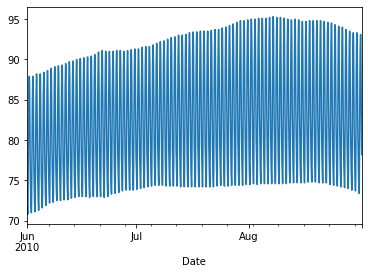

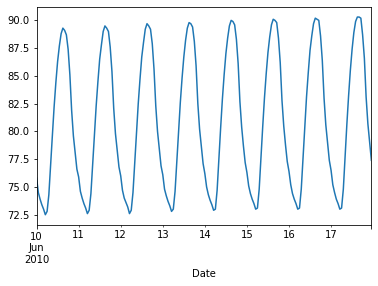

In [163]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()


## Case Study: Sunlight in Austin

### Reading and Cleaning Data

#### Reading in a Data File

In [79]:
import pandas as pd

df = pd.read_csv('data/NOAA_QCLCD_2011_hourly_13904.txt', header=None)
print(df.columns)
print(df.head())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
           dtype='int64')
      0         1    2   3       4  5      6  7  8  9   ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00           ...          29.95      
1  13904  20110101  153  12  OVC049     10.00           ...          30.01      
2  13904  20110101  253  12  OVC060     10.00           ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00           ...          30.03      
4  13904  20110101  453  12  BKN070     10.00           ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]


In [81]:
columns = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
df.columns = columns.split(',')
drop_cols = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']
df = df.drop(drop_cols, axis='columns')
print(df.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

In [83]:
df['date'] = df['date'].astype(str)
df['Time'] = df['Time'].apply(lambda x:'{:0>4}'.format(x))
date_string = df['date'] + df['Time']
datetimes = pd.to_datetime(date_string, format='%Y%m%d%H%M')
df = df.set_index(datetimes)
print(df.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [119]:
df['dry_bulb_faren'] = pd.to_numeric(df['dry_bulb_faren'], errors='coerce')
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')
df['dew_point_faren'] = pd.to_numeric(df['dew_point_faren'], errors='coerce')
df['visibility'] = pd.to_numeric(df['visibility'], errors='coerce')

### Statistical EDA

#### Signal Min, Max, Median

In [89]:
print(df['dry_bulb_faren'].median())

72.0


In [91]:
print(df.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

78.0


In [93]:
print(df.loc['2011-Jan', 'dry_bulb_faren'].median())

48.0


In [106]:
daily_mean = df.resample('D').mean()
daily_temp = daily_mean['dry_bulb_faren'].values
print(daily_temp[:5])

[50.16666667 39.41666667 46.84615385 53.36734694 57.96551724]


In [107]:
df2 = pd.read_csv('data/weather_data_austin_2010.csv', index_col='Date', parse_dates=['Date'])
daily_mean2 = df2.resample('D').mean()
daily_temp2 = daily_mean2.reset_index()['Temperature']
print(daily_temp2[:5])

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
Name: Temperature, dtype: float64


In [108]:
difference = daily_temp - daily_temp2
print(difference.mean())

1.3301831870056482


In [109]:
is_sky_clear = df['sky_condition'] == 'CLR'
sunny = df.loc[is_sky_clear]
sunny_daily_max = sunny.resample('D').max()
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [110]:
is_sky_overcast = df['sky_condition'].str.contains('OVC')
overcast = df.loc[is_sky_overcast]
overcast_daily_max = overcast.resample('D').max()
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


In [111]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean-overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


#### Visual EDA

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


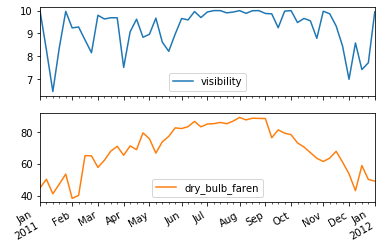

In [121]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()


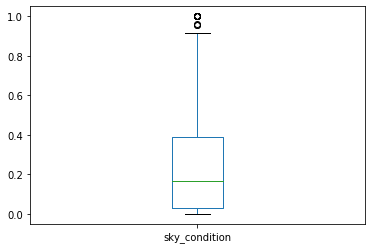

In [123]:
# From previous steps
is_sky_clear = df['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')
sunny_hours = resampled.sum()
total_hours = resampled.count()
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

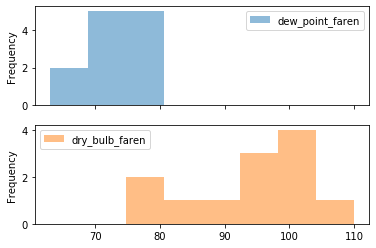

In [124]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

95.3


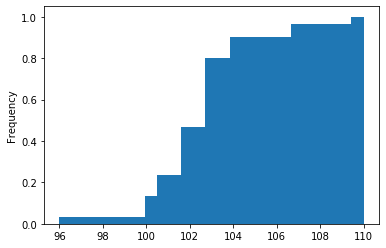

In [126]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df2.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()


In [127]:
date_rng = pd.date_range(start='2016-07-01', end='2016-07-17', freq='D')
print(date_rng)

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17'],
              dtype='datetime64[ns]', freq='D')
